In [139]:
import numpy as np
import pandas as pd
from array import *
import datetime
# from datetime import datetime
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import requests
import json
from terra_sdk.client.lcd import LCDClient
from datetime import datetime
#130.60.191.138
#terra = LCDClient(chain_id="columbus-5", url="https://columbus-lcd.terra.dev")
terra = LCDClient(chain_id="columbus-5", url="http://130.60.191.138:1317")
# print(terra.tendermint.node_info())

In [96]:
def delete_non_height_rows(data):
    invalid_row = 0
    for i in range(0, len(data)):
        if data[i][0] != 0:
            continue
        else:
            invalid_row = i
            break
    data = data[data[:,0] != 0]
    return data

In [99]:
def twodim_arrtolist(arr_data):
    list1 = []
    list2 = []
    for i in range(0, len(arr_data)):
        list1.append(arr_data[i][0])
        list2.append(arr_data[i][1])
    return list1, list2

In [30]:
def get_validators_per_block(validators_data):
    validators_per_block = []
    validators = []
    height = []
    for i in range(0, len(validators_data)):
        if i == 0:
            validators.append(validators_data['validators'][i])
            height.append(vali_2['height'][i])
            continue
        elif i == len(validators_data)-1:
            validators.append(validators_data['validators'][i])
            validators_per_block.append(validators)
        elif validators_data['height'][i] <= validators_data['height'][i-1]:
            validators.append(validators_data['validators'][i])
        elif validators_data['height'][i] > validators_data['height'][i-1]:
            validators_per_block.append(validators)
            height.append(validators_data['height'][i])
            validators.clear()
            validators.append(validators_data['validators'][i])
    return validators_per_block,height

In [14]:
def statistic_validators_per_block(validators_per_block_data):
    vali_num = []
    for i in range(0, len(validators_per_block_data)):
        vali_num.append(len(validators_per_block_data[i]))
    
    return vali_num
        

In [41]:
def get_validators_change_per_block(validators_per_block_data):
    validators_change_per_block = []
    validators_change = []
    cnt = 0
    for i in range(0, len(validators_per_block_data)):
        if i+1 <= len(validators_per_block_data)-1:
            t1 = validators_per_block_data[i].sort()
            t2 = validators_per_block_data[i+1].sort()
            if t1 == t2:
                validators_change_per_block.append(0)
            else:
                for j in range(0, 100):
                    if t1[j] != t2[j]:
                        validators_change_per_block.append(cnt)
                        cnt = cnt+1
    return validators_change_per_block

In [108]:
def currency_used(fee_data):
    currency_terra = [['aud',0],['cad',0],['chf',0],['cny',0],['dkk',0],['eur',0],['gbp',0],['hkd',0],['idr',0],['inr',0],['jpy',0],['krw',0],['mnt',0],['php',0],['sdr',0],['sek',0],['sgd',0],['thb',0],['usd',0]]

    for i in range(0, len(fee_data['fee_denom'])):
        if fee_data['fee_denom'][i][-3:] == 'aud':
            currency_terra[0][1] = currency_terra[0][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'cad':
            currency_terra[1][1] = currency_terra[1][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'chf':
            currency_terra[2][1] = currency_terra[2][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'cny':
            currency_terra[3][1] = currency_terra[3][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'dkk':
            currency_terra[4][1] = currency_terra[4][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'eur':
            currency_terra[5][1] = currency_terra[5][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'gbp':
            currency_terra[6][1] = currency_terra[6][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'hkd':
            currency_terra[7][1] = currency_terra[7][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'idr':
            currency_terra[8][1] = currency_terra[8][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'inr':
            currency_terra[9][1] = currency_terra[9][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'jpy':
            currency_terra[10][1] = currency_terra[10][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'krw':
            currency_terra[11][1] = currency_terra[11][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'mnt':
            currency_terra[12][1] = currency_terra[12][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'php':
            currency_terra[13][1] = currency_terra[13][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'sdr':
            currency_terra[14][1] = currency_terra[14][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'sek':
            currency_terra[15][1] = currency_terra[15][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'sgd':
            currency_terra[16][1] = currency_terra[16][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'thb':
            currency_terra[17][1] = currency_terra[17][1]+1
        elif fee_data['fee_denom'][i][-3:] == 'usd':
            currency_terra[18][1] = currency_terra[18][1]+1
        
    return currency_terra


In [109]:
def toPercent(data):
    sum_data = 0
    for i in range(0, len(data)):
        sum_data = sum_data + data[i][1]
    percent_each = []
    for i in range(0, len(data)):
        percent = data[i][1]/sum_data
        percent_each.append(percent)
        
    return percent_each

Get monthly currency:

In [87]:
Currency = ['aud','cad','chf','cny','dkk','eur','gbp','hkd','idr','inr','jpy','krw','mnt','php','sdr','sek','sgd','thb','usd']
Luna_Cur_2022_2_start = [72.48, 65.54, 47.61, 328.73, 341.12, 45.85, 38.21, 402.79, 740472.31, 3863.09, 5927.45, 62145.03, 147741.55, 216.3, 455.84, 2643.69, 37.14, 477.98, 69.72, 1715.47, 1434.44, 51.68]
Luna_Cur_2022_2_end = [123.22, 113.4, 82.05, 564.45, 593.06, 79.72, 66.66, 699.09, 1285454.22, 6766.35, 10287.9, 107450.48, 255769.55, 375.58, 788.42, 4590.37, 64.19, 846.68, 121.22, 2923.12, 2503.98, 89.47]
Luna_Cur_2022_2 = []
for i in range(0, len(Currency)):
    Luna_Cur_2022_2.append((Luna_Cur_2022_2_start[i]+Luna_Cur_2022_2_end[i])/2)

Luna_Cur_2022_2

[97.85,
 89.47,
 64.83,
 446.59000000000003,
 467.09,
 62.785,
 52.435,
 550.94,
 1012963.265,
 5314.72,
 8107.674999999999,
 84797.755,
 201755.55,
 295.94,
 622.13,
 3617.0299999999997,
 50.665,
 662.3299999999999,
 95.47]

In [88]:
Currency = ['aud','cad','chf','cny','dkk','eur','gbp','hkd','idr','inr','jpy','krw','mnt','php','sdr','sek','sgd','thb','usd']
Luna_Cur_2022_3_start = [123.42, 114.02, 82.2, 564.92, 598.64, 80.48, 67.16, 699.43, 1289219.04, 6817.21, 10282.7, 107878.76, 255841.98, 375.24, 796.5, 4604.79, 64.14, 863.03, 121.49, 2927.73, 2510.87, 89.49]
Luna_Cur_2022_3_end = [138.62, 129.76, 95.76, 657.86, 697.28, 93.72, 78.98, 812.54, 1488868.85, 7874.81, 12629.9, 126048.47, 298726.65, 436.24, 910.97, 5383.53, 74.92, 973.59, 140.54, 3454.05, 2970.08, 103.76]
Luna_Cur_2022_3 = []
for i in range(0, len(Currency)):
    Luna_Cur_2022_3.append((Luna_Cur_2022_3_start[i]+Luna_Cur_2022_3_end[i])/2)

Luna_Cur_2022_3

[131.02,
 121.88999999999999,
 88.98,
 611.39,
 647.96,
 87.1,
 73.07,
 755.9849999999999,
 1389043.945,
 7346.01,
 11456.3,
 116963.61499999999,
 277284.315,
 405.74,
 853.735,
 4994.16,
 69.53,
 918.31,
 131.015]

In [89]:
Currency = ['aud','cad','chf','cny','dkk','eur','gbp','hkd','idr','inr','jpy','krw','mnt','php','sdr','sek','sgd','thb','usd']
Luna_Cur_2022_4_start = [141.23, 132.6, 98.04, 673.98, 712.95, 95.87, 80.76, 829.75, 1522233.54, 8045.05, 12976.03, 129198.89, 304921.53, 445.98, 922.51, 5458.13, 76.66, 993.28, 143.71, 3549.72, 3037.98, 105.92]
Luna_Cur_2022_4_end = [113.96, 103.44, 78.41, 532.24, 568.13, 76.38, 64.05, 631.96, 1169846.86, 6163.16, 10452.92, 101760.67, 241205.31, 350.63, 751.32, 4218.7, 60.1, 791.75, 111.4, 2757.12, 2372.01, 80.54]
Luna_Cur_2022_4 = []
for i in range(0, len(Currency)):
    Luna_Cur_2022_4.append((Luna_Cur_2022_4_start[i]+Luna_Cur_2022_4_end[i])/2)

Luna_Cur_2022_4

[127.595,
 118.02,
 88.225,
 603.11,
 640.54,
 86.125,
 72.405,
 730.855,
 1346040.2000000002,
 7104.105,
 11714.475,
 115479.78,
 273063.42000000004,
 398.305,
 836.915,
 4838.415,
 68.38,
 892.515,
 127.555]

In [90]:
Currency = ['aud','cad','chf','cny','dkk','eur','gbp','hkd','idr','inr','jpy','krw','mnt','php','sdr','sek','sgd','thb','usd']
Luna_Cur_2022_5_start = [72.48, 65.54, 47.61, 328.73, 341.12, 45.85, 38.21, 402.79, 740472.31, 3863.09, 5927.45, 62145.03, 147741.55, 216.3, 455.84, 2643.69, 37.14, 477.98, 69.72, 1715.47, 1434.44, 51.68]
Luna_Cur_2022_5_7 = [95.14, 86.72, 66.59, 448.94, 475.1, 63.84, 54.57, 528.63, 976383.47, 5182.38, 8792.85, 85602.48, 201683.25, 294.31, 637.69, 3528.47, 50.06, 670.12, 93.29, 2312.58, 1997.53, 67.34]
Luna_Cur_2022_5 = []
for i in range(0, len(Currency)):
    Luna_Cur_2022_5.append((Luna_Cur_2022_5_start[i]+Luna_Cur_2022_5_7[i])/2)

Luna_Cur_2022_5

[83.81,
 76.13,
 57.1,
 388.83500000000004,
 408.11,
 54.845,
 46.39,
 465.71000000000004,
 858427.89,
 4522.735000000001,
 7360.15,
 73873.755,
 174712.4,
 255.305,
 546.765,
 3086.08,
 43.6,
 574.05,
 81.505]

In [91]:
Currency = ['aud','cad','chf','cny','dkk','eur','gbp','hkd','idr','inr','jpy','krw','mnt','php','sdr','sek','sgd','thb','usd']
Luna_Cur_2022_5_post_start = [94.44, 86.16, 65.94, 445.12, 471.28, 63.34, 54.08, 524.12, 968076.96, 5138.29, 8719.88, 84874.21, 199967.45, 291.76, 589.23, 3498.45, 49.64, 664.77, 92.55, 2293.88, 1980.53, 66.77]
Luna_Cur_2022_5_post_end = [0.000157, 0.000142, 0.000108, 0.000751, 0.000784, 0.000105, 0.000089, 0.000884, 1.641003, 0.008750, 0.014524, 0.140001, 0.346789, 0.000493, 0.001063, 0.005918, 0.0000835, 0.001108, 0.000154, 0.003868, 0.003273, 0.000112]
Luna_Cur_2022_5_post = []
for i in range(0, len(Currency)):
    Luna_Cur_2022_5_post.append((Luna_Cur_2022_5_post_start[i]+Luna_Cur_2022_5_post_end[i])/2)

Luna_Cur_2022_5_post

[47.2200785,
 43.080071,
 32.970054,
 222.5603755,
 235.640392,
 31.6700525,
 27.0400445,
 262.060442,
 484039.30050149997,
 2569.149375,
 4359.947262,
 42437.17500050001,
 99983.8983945,
 145.8802465,
 294.61553150000003,
 1749.2279589999998,
 24.82004175,
 332.385554,
 46.275076999999996]

In [92]:
Luna_Cur_2022_6 = [0.000157, 0.000142, 0.000108, 0.000751, 0.000784, 0.000105, 0.000089, 0.000884, 1.641003, 0.008750, 0.014524, 0.140001, 0.346789, 0.000493, 0.001063, 0.005918, 0.0000835, 0.001108, 0.000154, 0.003868, 0.003273, 0.000112]

In [93]:
def set_same_unit_luna(fee_data, month):
    fee_amount_luna = []
    if month == 2:
        for n in range(0, len(fee_data['fee_denom'])):
        # print(n)
            if list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency)) == []:
                fee_amount_luna.append(fee_data['fee_amount'][n])
                continue
            if fee_data['fee_denom'][n][-3:] == list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency))[0]:
                fee_amount_luna.append(fee_data['fee_amount'][n]/Luna_Cur_2022_2[Currency.index(fee_data['fee_denom'][n][-3:])])
    elif month == 3:
        for n in range(0, len(fee_data['fee_denom'])):
        # print(n)
            if list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency)) == []:
                fee_amount_luna.append(fee_data['fee_amount'][n])
                continue
            if fee_data['fee_denom'][n][-3:] == list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency))[0]:
                fee_amount_luna.append(fee_data['fee_amount'][n]/Luna_Cur_2022_3[Currency.index(fee_data['fee_denom'][n][-3:])])
    elif month == 4:
        for n in range(0, len(fee_data['fee_denom'])):
        # print(n)
            if list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency)) == []:
                fee_amount_luna.append(fee_data['fee_amount'][n])
                continue
            if fee_data['fee_denom'][n][-3:] == list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency))[0]:
                fee_amount_luna.append(fee_data['fee_amount'][n]/Luna_Cur_2022_4[Currency.index(fee_data['fee_denom'][n][-3:])])
    elif month == 5:
        for n in range(0, len(fee_data['fee_denom'])):
        # print(n)
            if list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency)) == []:
                fee_amount_luna.append(fee_data['fee_amount'][n])
                continue
            if fee_data['fee_denom'][n][-3:] == list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency))[0]:
                fee_amount_luna.append(fee_data['fee_amount'][n]/Luna_Cur_2022_5[Currency.index(fee_data['fee_denom'][n][-3:])])
    elif month == 6:
        for n in range(0, len(fee_data['fee_denom'])):
        # print(n)
            if list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency)) == []:
                fee_amount_luna.append(fee_data['fee_amount'][n])
                continue
            if fee_data['fee_denom'][n][-3:] == list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency))[0]:
                fee_amount_luna.append(fee_data['fee_amount'][n]/Luna_Cur_2022_6[Currency.index(fee_data['fee_denom'][n][-3:])])
    elif month == 7:
        for n in range(0, len(fee_data['fee_denom'])):
        # print(n)
            if list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency)) == []:
                fee_amount_luna.append(fee_data['fee_amount'][n])
                continue
            if fee_data['fee_denom'][n][-3:] == list(filter(lambda a: fee_data['fee_denom'][n][-3:] in a, Currency))[0]:
                fee_amount_luna.append(fee_data['fee_amount'][n]/Luna_Cur_2022_5_post[Currency.index(fee_data['fee_denom'][n][-3:])])

    return fee_amount_luna

In [82]:
def total_fee_per_block(fee_same_unit_data,fee_data_with_height):
    k = 0
    fee_amount_luna_per_block = np.zeros((fee_data_with_height['height1'][len(fee_data_with_height['fee_denom'])-1]-fee_data_with_height['height1'][0], 2), dtype=int)
    for m in range(0, len(fee_data_with_height['fee_denom'])):
        if m == 0:
            fee_amount_luna_per_block[k][1] = fee_same_unit_data[m]
            fee_amount_luna_per_block[k][0] = fee_data_with_height['height1'][0]
            continue
        elif fee_data_with_height['height1'][m] <= fee_data_with_height['height1'][m-1]:
            fee_before = fee_amount_luna_per_block[k][1]
            fee_amount_luna_per_block[k][1] = fee_same_unit_data[m] + fee_before
            fee_amount_luna_per_block[k][0] = fee_data_with_height['height1'][m]
        elif fee_data_with_height['height1'][m] > fee_data_with_height['height1'][m-1]:
            k = k+1
            # print(fee_2['height1'][m])
            fee_amount_luna_per_block[k][1] = fee_same_unit_data[m]
            fee_amount_luna_per_block[k][0] = fee_data_with_height['height1'][m]

    return fee_amount_luna_per_block

In [83]:
def get_latest_rates():
    valis = terra.staking.validators()
    commission_rate = []
    for i in range(0, len(valis[0])):
        commission_rate.append(float(valis[0][i].commission.commission_rates.rate.to_data()))
    commission_rate_avg = statistics.mean(commission_rate)
    # print(commission_rate_avg)#0.149377
    self_delegation_rate = [0, 88.59, 0, 0.02, 0.2, 0, 0, 37.53, 0.48, 0, 0, 0, 0.11, 0.94, 0, 0.01, 0.03, 0.19, 0.17]
    self_delegation_rate_avg = statistics.mean(self_delegation_rate)
    # print(self_delegation_rate_avg)#6.751052631578948%
    return commission_rate_avg, self_delegation_rate_avg


In [84]:
def rewards_theoritical(total_fee_per_block_luna,latest_commission_rate_avg, latest_delegation_rate_avg):
    RV = []
    commissions = []
    validators_rewards = []
    delegators_rewards = []
    for i in range(0, len(total_fee_per_block_luna)):
        rv = total_fee_per_block_luna[i][1]/100
        RV.append(rv)
        commission = rv*latest_commission_rate_avg*(1-(latest_delegation_rate_avg/100))
        commissions.append(commission)
        vali_re = rv*latest_delegation_rate_avg/100 + commission
        validators_rewards.append(vali_re)
        dele_re = rv*(1-(latest_delegation_rate_avg/100)) - commission
        delegators_rewards.append(dele_re)
    return validators_rewards,delegators_rewards

In [85]:
def compute_gini_index(vali_rewards, dele_rewards):
    difference_sum_vali = 0
    validators_rewards_arr = np.asarray(vali_rewards)
    for i, xi in enumerate(validators_rewards_arr[:-1], 1):
        difference_sum_vali += np.sum(np.abs(xi - validators_rewards_arr[i:]))
    difference_sum_dele = 0
    delegators_rewards_arr = np.asarray(dele_rewards)
    for j, xj in enumerate(delegators_rewards_arr[:-1], 1):
        difference_sum_dele += np.sum(np.abs(xj - delegators_rewards_arr[j:]))
        # print(diffsum)
    gini_vali = difference_sum_vali / (len(validators_rewards_arr) ** 2 * np.mean(validators_rewards_arr))
    gini_dele = difference_sum_dele / (len(delegators_rewards_arr) ** 2 * np.mean(delegators_rewards_arr))
    return gini_vali,gini_dele

In [184]:
def creationtime_per_block(time_data):
    hour = []
    mins = []
    secs = []
    millisec = []
    creation_pre_block = []
    for i in range(0, len(time_data)):
        if i == 0:
            hour.append(int(time_data['timestamp'][i][11:13]))
            mins.append(int(time_data['timestamp'][i][14:16]))
            secs.append(int(time_data['timestamp'][i][17:19]))
            millisec.append(int(time_data['timestamp'][i][20:25]))
        else:
            hour.append(int(time_data['timestamp'][i][11:13]))
            mins.append(int(time_data['timestamp'][i][14:16]))
            secs.append(int(time_data['timestamp'][i][17:19]))
            millisec.append(int(time_data['timestamp'][i][20:25]))
            dt1 = datetime(2022,2,16,hour[i-1],mins[i-1],secs[i-1])
            dt2 = datetime(2022,2,16,hour[i],mins[i],secs[i])
            # print((dt2-dt1).seconds)
            # print(i)
            creation_pre_block.append((dt2-dt1).seconds)
    avg_per_block_time = np.mean(creation_pre_block)
    max_per_block_time = np.max(creation_pre_block)
    min_per_block_time = np.min(creation_pre_block)
    return avg_per_block_time,max_per_block_time,min_per_block_time#,creation_pre_block

read data from xlsx or csv:

In [20]:
vali_2 = pd.read_excel(open('./results/sample_data9.xlsx', 'rb'),sheet_name='sheet1')
vali_2_1 = pd.read_excel(open('./results/sample_data9_1.xlsx', 'rb'),sheet_name='sheet1')
vali_2_2 = pd.read_excel(open('./results/sample_data9_2.xlsx', 'rb'),sheet_name='sheet1')
vali_2 = pd.concat([vali_2, vali_2_1],ignore_index=True, axis=0)
vali_2 = pd.concat([vali_2, vali_2_2],ignore_index=True, axis=0)
vali_3 = pd.read_excel(open('./results/sample_data5_1.xlsx', 'rb'),sheet_name='sheet1')
vali_3_1 = pd.read_excel(open('./results/sample_data13.xlsx', 'rb'),sheet_name='sheet1')
vali_3_2 = pd.read_excel(open('./results/sample_data13_1.xlsx', 'rb'),sheet_name='sheet1')
vali_3 = pd.concat([vali_3, vali_3_1],ignore_index=True, axis=0)
vali_3 = pd.concat([vali_3, vali_3_2],ignore_index=True, axis=0)
vali_4 = pd.read_excel(open('./results/sample_data17.xlsx', 'rb'),sheet_name='sheet1')
vali_4_1 = pd.read_excel(open('./results/sample_data17_1.xlsx', 'rb'),sheet_name='sheet1')
vali_4_2 = pd.read_excel(open('./results1/sample_data121.xlsx', 'rb'),sheet_name='sheet1')
vali_4_3 = pd.read_excel(open('./results1/sample_data21_1.xlsx', 'rb'),sheet_name='sheet1')
vali_4_4 = pd.read_excel(open('./results/sample_data1.xlsx', 'rb'),sheet_name='sheet1')
vali_4_5 = pd.read_excel(open('./results/sample_data1_1.xlsx', 'rb'),sheet_name='sheet1')
vali_4 = pd.concat([vali_4, vali_4_1],ignore_index=True, axis=0)
vali_4 = pd.concat([vali_4, vali_4_2],ignore_index=True, axis=0)
vali_4 = pd.concat([vali_4, vali_4_3],ignore_index=True, axis=0)
vali_4 = pd.concat([vali_4, vali_4_4],ignore_index=True, axis=0)
vali_4 = pd.concat([vali_4, vali_4_5],ignore_index=True, axis=0)
vali_5 = pd.read_excel(open('./results1/sample_data17.xlsx', 'rb'),sheet_name='sheet1')
vali_5_1 = pd.read_excel(open('./results1/sample_data17_1.xlsx', 'rb'),sheet_name='sheet1')
vali_5_2 = pd.read_excel(open('./results1/sample_data29_2.xlsx', 'rb'),sheet_name='sheet1')
vali_5_3 = pd.read_excel(open('./results/sample_data9_3.xlsx', 'rb'),sheet_name='sheet1')
vali_5_4 = pd.read_excel(open('./results/sample_data9_4.xlsx', 'rb'),sheet_name='sheet1')
vali_5_5 = pd.read_excel(open('./results/sample_data13_2.xlsx', 'rb'),sheet_name='sheet1')
vali_5_6 = pd.read_excel(open('./results1/sample_data25.xlsx', 'rb'),sheet_name='sheet1')
vali_5_7 = pd.read_excel(open('./results1/sample_data25_1.xlsx', 'rb'),sheet_name='sheet1')
vali_5_8 = pd.read_excel(open('./results1/sample_data25_2.xlsx', 'rb'),sheet_name='sheet1')
vali_5_9 = pd.read_excel(open('./results1/sample_data25_3.xlsx', 'rb'),sheet_name='sheet1')
vali_5_10 = pd.read_excel(open('./results1/sample_data25_4.xlsx', 'rb'),sheet_name='sheet1')
vali_5 = pd.concat([vali_5, vali_5_1],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_2],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_3],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_4],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_5],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_6],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_7],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_8],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_9],ignore_index=True, axis=0)
vali_5 = pd.concat([vali_5, vali_5_10],ignore_index=True, axis=0)
vali_6 = pd.read_excel(open('./results1/sample_data29_1.xlsx', 'rb'),sheet_name='sheet1')
vali_6_1 = pd.read_excel(open('./results1/sample_data29_2.xlsx', 'rb'),sheet_name='sheet1')
vali_6 = pd.concat([vali_6, vali_5_1],ignore_index=True, axis=0)


In [31]:
validators_each_block_2,heights_2 = get_validators_per_block(vali_2)
validators_each_block_3,heights_3 = get_validators_per_block(vali_3)
validators_each_block_4,heights_4 = get_validators_per_block(vali_4)
validators_each_block_5,heights_5 = get_validators_per_block(vali_5)
validators_each_block_6,heights_6 = get_validators_per_block(vali_6)
vali_num_data_2 = statistic_validators_per_block(validators_each_block_2)
vali_num_data_3 = statistic_validators_per_block(validators_each_block_3)
vali_num_data_4 = statistic_validators_per_block(validators_each_block_4)
vali_num_data_5 = statistic_validators_per_block(validators_each_block_5)
vali_num_data_6 = statistic_validators_per_block(validators_each_block_6)

In [ ]:
different_cnt_vali_2 = list(set(vali_num_data_2))
different_cnt_vali_3 = list(set(vali_num_data_3))
different_cnt_vali_4 = list(set(vali_num_data_4))
different_cnt_vali_5 = list(set(vali_num_data_5))
different_cnt_vali_6 = list(set(vali_num_data_6))
print(different_cnt_vali_2)
print(different_cnt_vali_3)
print(different_cnt_vali_4)
print(different_cnt_vali_5)
print(different_cnt_vali_6)

[100]
[100]
[100]
[100]
[100]


In [116]:
validators_2_6 = [100,100,100,100,100]
months = ['Feb','Mar','Apr','May','Jun']

In [36]:
df1 = {'Months':months,'validators_count':validators_2_6}
df1 = pd.DataFrame(df1)

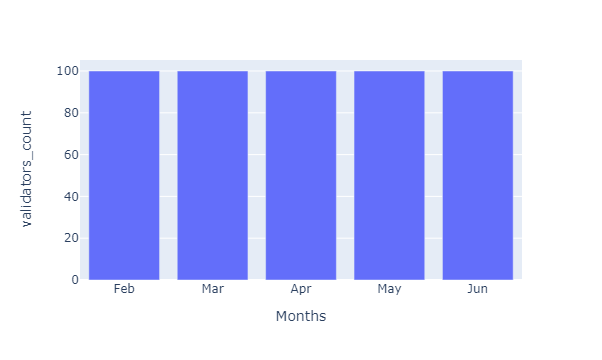

In [37]:
fig = px.bar(df1, x="Months", y="validators_count",
             color_discrete_map={"validators_count": "#636efa"}) #Plot the data in a stacked bar chart

fig.show()

In [42]:
validators_change_per_block_data_2 = get_validators_change_per_block(validators_each_block_2)
validators_change_per_block_data_3 = get_validators_change_per_block(validators_each_block_3)
validators_change_per_block_data_4 = get_validators_change_per_block(validators_each_block_4)
validators_change_per_block_data_5 = get_validators_change_per_block(validators_each_block_5)
validators_change_per_block_data_6 = get_validators_change_per_block(validators_each_block_6)
change_cnt_vali_2 = list(set(validators_change_per_block_data_2))
change_cnt_vali_3 = list(set(validators_change_per_block_data_3))
change_cnt_vali_4 = list(set(validators_change_per_block_data_4))
change_cnt_vali_5 = list(set(validators_change_per_block_data_5))
change_cnt_vali_6 = list(set(validators_change_per_block_data_6))
print(change_cnt_vali_2)
print(change_cnt_vali_3)
print(change_cnt_vali_4)
print(change_cnt_vali_5)
print(change_cnt_vali_6)

[0]
[0]
[0]
[0]
[0]


In [43]:
validators_change_2_6 = [0,0,0,0,0]
months = ['Feb','Mar','Apr','May','Jun']

In [44]:
df2 = {'Months':months,'validators_change_count':validators_change_2_6}
df2 = pd.DataFrame(df2)

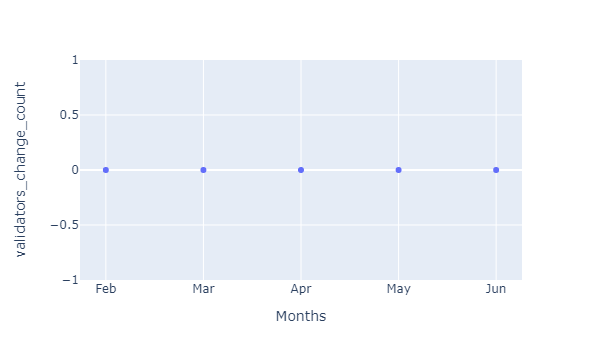

In [49]:
fig1 = px.scatter(df2, x='Months', y='validators_change_count')
fig1.show()

In [64]:
fee_2 = pd.read_excel(open('./results/sample_data10.xlsx', 'rb'),sheet_name='sheet1')
fee_2_1 = pd.read_excel(open('./results/sample_data10_1.xlsx', 'rb'),sheet_name='sheet1')
fee_2_2 = pd.read_excel(open('./results/sample_data10_2.xlsx', 'rb'),sheet_name='sheet1')
fee_2 = pd.concat([fee_2, fee_2_1],ignore_index=True, axis=0)
fee_2 = pd.concat([fee_2, fee_2_2],ignore_index=True, axis=0)
fee_3 = pd.read_excel(open('./results/sample_data6_1.xlsx', 'rb'),sheet_name='sheet1')
fee_3_1 = pd.read_excel(open('./results/sample_data14.xlsx', 'rb'),sheet_name='sheet1')
fee_3_2 = pd.read_excel(open('./results/sample_data14_1.xlsx', 'rb'),sheet_name='sheet1')
fee_3 = pd.concat([fee_3, fee_3_1],ignore_index=True, axis=0)
fee_3 = pd.concat([fee_3, fee_3_2],ignore_index=True, axis=0)
fee_4 = pd.read_excel(open('./results/sample_data18.xlsx', 'rb'),sheet_name='sheet1')
fee_4_1 = pd.read_excel(open('./results/sample_data18_1.xlsx', 'rb'),sheet_name='sheet1')
fee_4_2 = pd.read_excel(open('./results1/sample_data22.xlsx', 'rb'),sheet_name='sheet1')
fee_4_3 = pd.read_excel(open('./results1/sample_data22_1.xlsx', 'rb'),sheet_name='sheet1')
fee_4_4 = pd.read_excel(open('./results/sample_data2.xlsx', 'rb'),sheet_name='sheet1')
fee_4_5 = pd.read_excel(open('./results/sample_data2_1.xlsx', 'rb'),sheet_name='sheet1')
fee_4 = pd.concat([fee_4, fee_4_1],ignore_index=True, axis=0)
fee_4 = pd.concat([fee_4, fee_4_2],ignore_index=True, axis=0)
fee_4 = pd.concat([fee_4, fee_4_3],ignore_index=True, axis=0)
fee_4 = pd.concat([fee_4, fee_4_4],ignore_index=True, axis=0)
fee_4 = pd.concat([fee_4, fee_4_5],ignore_index=True, axis=0)

fee_6 = pd.read_excel(open('./results1/sample_data30.xlsx', 'rb'),sheet_name='sheet1')
fee_6_1 = pd.read_excel(open('./results1/sample_data30_1.xlsx', 'rb'),sheet_name='sheet1')
fee_6 = pd.concat([fee_6, fee_6_1],ignore_index=True, axis=0)


In [65]:
fee_5 = pd.read_excel(open('./results1/sample_data18.xlsx', 'rb'),sheet_name='sheet1')
fee_5_1 = pd.read_excel(open('./results1/sample_data18_1.xlsx', 'rb'),sheet_name='sheet1')
fee_5_2 = pd.read_excel(open('./results1/sample_data30_2.xlsx', 'rb'),sheet_name='sheet1')
fee_5_3 = pd.read_excel(open('./results/sample_data10_3.xlsx', 'rb'),sheet_name='sheet1')
fee_5_4 = pd.read_excel(open('./results/sample_data10_4.xlsx', 'rb'),sheet_name='sheet1')
fee_5_5 = pd.read_excel(open('./results/sample_data14_2.xlsx', 'rb'),sheet_name='sheet1')
fee_5_6 = pd.read_excel(open('./results1/sample_data26.xlsx', 'rb'),sheet_name='sheet1')
fee_5_7 = pd.read_excel(open('./results1/sample_data26_1.xlsx', 'rb'),sheet_name='sheet1')
fee_5_8 = pd.read_excel(open('./results1/sample_data26_2.xlsx', 'rb'),sheet_name='sheet1')
fee_5_9 = pd.read_excel(open('./results1/sample_data26_3.xlsx', 'rb'),sheet_name='sheet1')
fee_5_10 = pd.read_excel(open('./results1/sample_data26_4.xlsx', 'rb'),sheet_name='sheet1')
fee_5_6 = fee_5_6.rename(columns={"stake_denom":"fee_denom","stake_amount":"fee_amount"})
fee_5_7 = fee_5_7.rename(columns={"stake_denom":"fee_denom","stake_amount":"fee_amount"})
fee_5_8 = fee_5_8.rename(columns={"stake_denom":"fee_denom","stake_amount":"fee_amount"})
fee_5_9 = fee_5_9.rename(columns={"stake_denom":"fee_denom","stake_amount":"fee_amount"})
fee_5_10 = fee_5_10.rename(columns={"stake_denom":"fee_denom","stake_amount":"fee_amount"})

fee_5_1 = pd.concat([fee_5_1, fee_5_2],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_3],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_4],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_5],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_6],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_7],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_8],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_9],ignore_index=True, axis=0)
fee_5_1 = pd.concat([fee_5_1, fee_5_10],ignore_index=True, axis=0)

In [97]:
fee_denom_luna_set_2 = set_same_unit_luna(fee_2,2)
fee_denom_luna_set_3 = set_same_unit_luna(fee_3,3)
fee_denom_luna_set_4 = set_same_unit_luna(fee_4,4)
fee_denom_luna_set_5 = set_same_unit_luna(fee_5,5)
fee_denom_luna_set_5_1 = set_same_unit_luna(fee_5_1,7)
fee_denom_luna_set_6 = set_same_unit_luna(fee_6,6)
total_fee_each_block_2 = total_fee_per_block(fee_denom_luna_set_2,fee_2)
total_fee_each_block_3 = total_fee_per_block(fee_denom_luna_set_3,fee_3)
total_fee_each_block_4 = total_fee_per_block(fee_denom_luna_set_4,fee_4)
total_fee_each_block_5 = total_fee_per_block(fee_denom_luna_set_5,fee_5)
total_fee_each_block_5_1 = total_fee_per_block(fee_denom_luna_set_5_1,fee_5_1)
total_fee_each_block_6 = total_fee_per_block(fee_denom_luna_set_6,fee_6)
total_fee_each_block_valid_2 = delete_non_height_rows(total_fee_each_block_2)
total_fee_each_block_valid_3 = delete_non_height_rows(total_fee_each_block_3)
total_fee_each_block_valid_4 = delete_non_height_rows(total_fee_each_block_4)
total_fee_each_block_valid_5 = delete_non_height_rows(total_fee_each_block_5)
total_fee_each_block_valid_5_1 = delete_non_height_rows(total_fee_each_block_5_1)
total_fee_each_block_valid_6 = delete_non_height_rows(total_fee_each_block_6)

In [101]:
heights_2, total_rewards_each_block_2 = twodim_arrtolist(total_fee_each_block_valid_2)
heights_3, total_rewards_each_block_3 = twodim_arrtolist(total_fee_each_block_valid_3)
heights_4, total_rewards_each_block_4 = twodim_arrtolist(total_fee_each_block_valid_4)
heights_5, total_rewards_each_block_5 = twodim_arrtolist(total_fee_each_block_valid_5)
heights_5_1, total_rewards_each_block_5_1 = twodim_arrtolist(total_fee_each_block_valid_5_1)
heights_6, total_rewards_each_block_6 = twodim_arrtolist(total_fee_each_block_valid_6)

In [102]:
df3 = {'Heights_Feb':heights_2,'Total_Rewards_Per_Block':total_rewards_each_block_2}
df3 = pd.DataFrame(df3)
df3_1 = {'Heights_Mar':heights_3,'Total_Rewards_Per_Block':total_rewards_each_block_3}
df3_1 = pd.DataFrame(df3_1)
df3_2 = {'Heights_Apr':heights_4,'Total_Rewards_Per_Block':total_rewards_each_block_4}
df3_2 = pd.DataFrame(df3_2)
df3_3 = {'Heights_May':heights_5,'Total_Rewards_Per_Block':total_rewards_each_block_5}
df3_3 = pd.DataFrame(df3_3)
df3_4 = {'Heights_Jun':heights_6,'Total_Rewards_Per_Block_Post_Attack':total_rewards_each_block_6}
df3_4 = pd.DataFrame(df3_4)
df3_5 = {'Heights_May_Dur_Attack':heights_5_1,'Total_Rewards_Per_Block':total_rewards_each_block_5_1}
df3_5 = pd.DataFrame(df3_5)

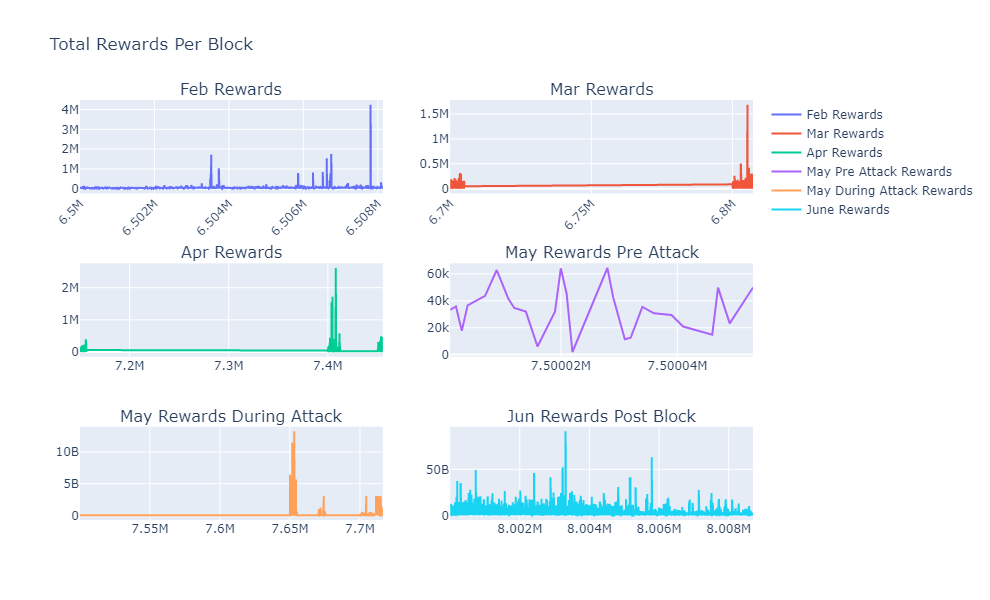

In [120]:
fig2 = make_subplots(rows=3, cols=2, subplot_titles=("Feb Rewards", "Mar Rewards","Apr Rewards","May Rewards Pre Attack","May Rewards During Attack","Jun Rewards Post Block"))

fig2.add_trace(go.Scatter(
    name='Feb Rewards',
    x=df3.Heights_Feb,
    y=df3.Total_Rewards_Per_Block,mode='lines'),row=1,col=1)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig2.add_trace(go.Scatter(
    name='Mar Rewards',
    x=df3_1.Heights_Mar,
    y=df3_1.Total_Rewards_Per_Block,mode='lines'),row=1,col=2)

fig2.add_trace(go.Scatter(
    name='Apr Rewards',
    x=df3_2.Heights_Apr,
    y=df3_2.Total_Rewards_Per_Block,mode='lines'),row=2,col=1)

fig2.add_trace(go.Scatter(
    name='May Pre Attack Rewards',
    x=df3_3.Heights_May,
    y=df3_3.Total_Rewards_Per_Block,mode='lines'),row=2,col=2)

fig2.add_trace(go.Scatter(
    name='May During Attack Rewards',
    x=df3_5.Heights_May_Dur_Attack,
    y=df3_5.Total_Rewards_Per_Block,mode='lines'),row=3,col=1)

fig2.add_trace(go.Scatter(
    name='June Rewards',
    x=df3_4.Heights_Jun,
    y=df3_4.Total_Rewards_Per_Block_Post_Attack,mode='lines'),row=3,col=2)
   
# Here we modify the tickangle of the xaxis, re6sulting in rotated labels.
fig2.update_layout(height=600, width=800,xaxis_tickangle=-45,xaxis2_tickangle=-45,title_text="Total Rewards Per Block")
fig2.show()

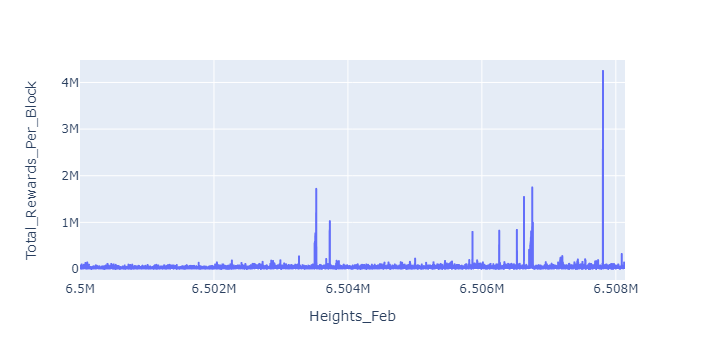

In [105]:
fig3 = px.line(df3, x="Heights_Feb", y="Total_Rewards_Per_Block",) #Plot the data in a stacked bar chart

fig3.show()

In [106]:
Latest_commission_avg, latest_delegation_avg = get_latest_rates()
# fee_51 = pd.concat([fee_5, fee_5_1],ignore_index=True, axis=0)
validators_rewards_theor_2, delegators_rewards_theor_2 = rewards_theoritical(total_fee_each_block_valid_2,Latest_commission_avg, latest_delegation_avg)
validators_rewards_theor_3, delegators_rewards_theor_3 = rewards_theoritical(total_fee_each_block_valid_3,Latest_commission_avg, latest_delegation_avg)
validators_rewards_theor_4, delegators_rewards_theor_4 = rewards_theoritical(total_fee_each_block_valid_4,Latest_commission_avg, latest_delegation_avg)
validators_rewards_theor_5, delegators_rewards_theor_5 = rewards_theoritical(total_fee_each_block_valid_5,Latest_commission_avg, latest_delegation_avg)
validators_rewards_theor_6, delegators_rewards_theor_6 = rewards_theoritical(total_fee_each_block_valid_6,Latest_commission_avg, latest_delegation_avg)
GINI_2_vali, GINI_2_dele = compute_gini_index(validators_rewards_theor_2,delegators_rewards_theor_2)
GINI_3_vali, GINI_3_dele = compute_gini_index(validators_rewards_theor_3,delegators_rewards_theor_3)
GINI_4_vali, GINI_4_dele = compute_gini_index(validators_rewards_theor_4,delegators_rewards_theor_4)
GINI_5_vali, GINI_5_dele = compute_gini_index(validators_rewards_theor_5,delegators_rewards_theor_5)
GINI_6_vali, GINI_6_dele = compute_gini_index(validators_rewards_theor_6,delegators_rewards_theor_6)

In [202]:
gini_index_vali = [GINI_2_vali,GINI_3_vali,GINI_4_vali,GINI_5_vali,GINI_6_vali]
gini_index_dele = [GINI_2_dele,GINI_3_dele,GINI_4_dele,GINI_5_dele,GINI_6_dele]
df4 = {'Months':months,'Gini_index':gini_index_vali}
df4 = pd.DataFrame(df4)
df5 = {'Months':months,'Gini_index':gini_index_dele}
df5 = pd.DataFrame(df5)
# df4 = pd.concat([df4, df5],ignore_index=True, axis=0)

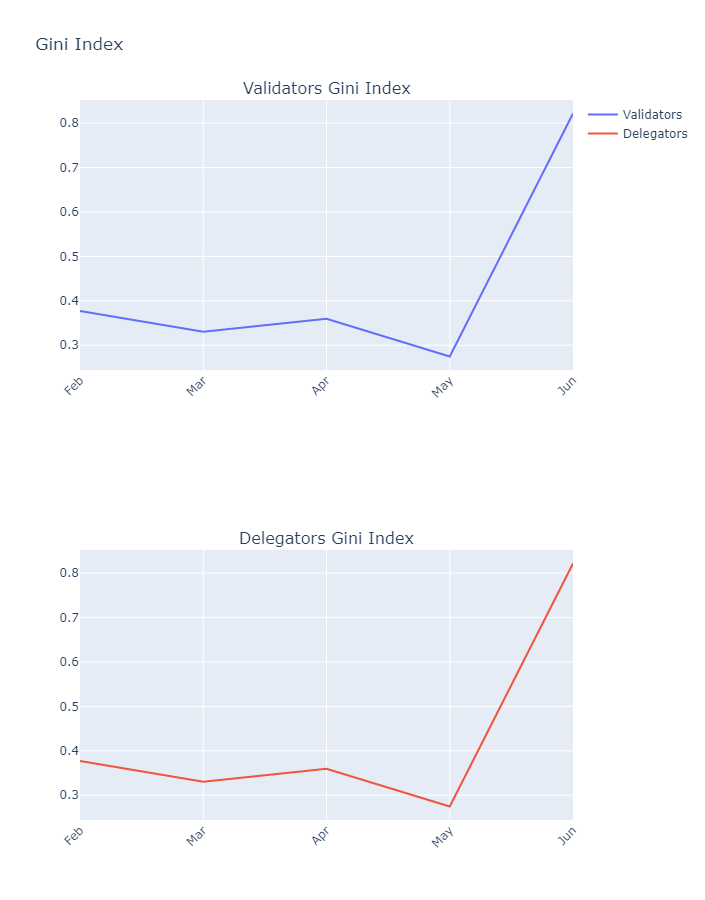

In [206]:
# fig4 = px.line(df4, x="Months", y="Gini_index",color='isValidator')
fig4 = make_subplots(rows=2, cols=1, subplot_titles=("Validators Gini Index", "Delegators Gini Index"))

fig4.add_trace(go.Scatter(
    name='Validators',
    x=df4.Months,
    y=df4.Gini_index,mode='lines'),row=1,col=1)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig4.add_trace(go.Scatter(
    name='Delegators',
    x=df5.Months,
    y=df5.Gini_index,mode='lines'),row=2,col=1)
fig4.update_layout(barmode='group',width=500,height=900,xaxis_tickangle=-45,xaxis2_tickangle=-45,title_text="Gini Index")

fig4.show()

In [111]:
fee_51 = pd.concat([fee_5, fee_5_1],ignore_index=True, axis=0)
currency_used_2 = currency_used(fee_2)
currency_used_3 = currency_used(fee_3)
currency_used_4 = currency_used(fee_4)
currency_used_5 = currency_used(fee_51)
currency_used_6 = currency_used(fee_6)
currency_used_percent_2 = toPercent(currency_used_2)
currency_used_percent_3 = toPercent(currency_used_3)
currency_used_percent_4 = toPercent(currency_used_4)
currency_used_percent_5 = toPercent(currency_used_5)
currency_used_percent_6 = toPercent(currency_used_6)

In [226]:
currency_used_2[0][1]

0

In [241]:
currency_used_percent_2

[0.0,
 0.0,
 1.7804207134145798e-05,
 8.902103567072899e-06,
 0.0,
 0.00010682524280487479,
 8.902103567072899e-06,
 8.902103567072899e-06,
 0.0,
 0.0,
 8.902103567072899e-06,
 0.1950806975688355,
 0.0001335315535060935,
 0.0,
 0.0001246294499390206,
 1.7804207134145798e-05,
 0.0,
 1.7804207134145798e-05,
 0.8044652951492438]

In [130]:
df6 = {'Currency':Currency,'Currency_Percent':currency_used_percent_2}
df6 = pd.DataFrame(df6)
df7 = {'Currency':Currency,'Currency_Percent':currency_used_percent_3}
df7 = pd.DataFrame(df7)
df8 = {'Currency':Currency,'Currency_Percent':currency_used_percent_4}
df8 = pd.DataFrame(df8)
df9 = {'Currency':Currency,'Currency_Percent':currency_used_percent_5}
df9 = pd.DataFrame(df9)
df10 = {'Currency':Currency,'Currency_Percent':currency_used_percent_6}
df10 = pd.DataFrame(df10)

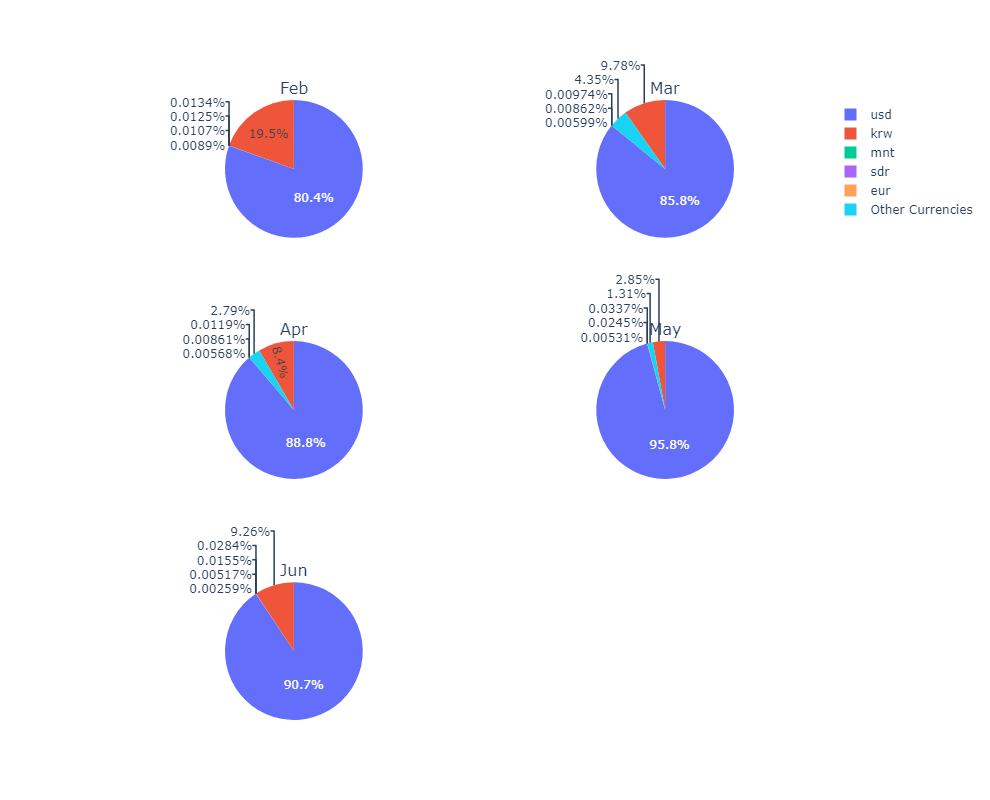

In [131]:
df6.loc[df6['Currency_Percent'] < 2.e-5, 'Currency'] = 'Other Currencies'
df7.loc[df6['Currency_Percent'] < 2.e-5, 'Currency'] = 'Other Currencies'
df8.loc[df6['Currency_Percent'] < 2.e-5, 'Currency'] = 'Other Currencies'
df9.loc[df6['Currency_Percent'] < 2.e-5, 'Currency'] = 'Other Currencies'
df10.loc[df6['Currency_Percent'] < 2.e-5, 'Currency'] = 'Other Currencies'
fig5 = make_subplots(rows=3, cols=2, subplot_titles=("Feb", "Mar","Apr","May","Jun"),specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"}],[{"type": "pie"},{"type": "pie"}]])
#,"Apr","May","Jun"
fig5.add_trace(go.Pie(
    values=df6['Currency_Percent'],
    labels=df6['Currency'],
    domain=dict(x=[0, 0.5]),),row=1,col=1)
fig5.add_trace(go.Pie(
    values=df7['Currency_Percent'],
    labels=df7['Currency'],
    domain=dict(x=[0.5, 1.0]),),row=1,col=2)
fig5.add_trace(go.Pie(
    values=df8['Currency_Percent'],
    labels=df8['Currency'],
    domain=dict(x=[0, 0.5]),),row=2,col=1)
fig5.add_trace(go.Pie(
    values=df9['Currency_Percent'],
    labels=df9['Currency'],
    domain=dict(x=[0.5, 1]),),row=2,col=2)
fig5.add_trace(go.Pie(
    values=df10['Currency_Percent'],
    labels=df10['Currency'],
    domain=dict(x=[0, 0.5]),),row=3,col=1)
# Here we modify the tickangle of the xaxis, resulting in rotated labels.

# Here we modify the tickangle of the xaxis, re6sulting in rotated labels.
fig5.update_layout(height=800, width=800,uniformtext_minsize=12, uniformtext_mode='hide')
fig5.show()

In [132]:
time_2 = pd.read_excel(open('./results/sample_data12.xlsx', 'rb'),sheet_name='sheet1')
time_2_1 = pd.read_excel(open('./results/sample_data12_1.xlsx', 'rb'),sheet_name='sheet1')
time_2_2 = pd.read_excel(open('./results/sample_data12_2.xlsx', 'rb'),sheet_name='sheet1')
time_2 = pd.concat([time_2, time_2_1],ignore_index=True, axis=0)
time_2 = pd.concat([time_2, time_2_2],ignore_index=True, axis=0)
time_3 = pd.read_excel(open('./results/sample_data8_1.xlsx', 'rb'),sheet_name='sheet1')
time_3_1 = pd.read_excel(open('./results/sample_data16.xlsx', 'rb'),sheet_name='sheet1')
time_3_2 = pd.read_excel(open('./results/sample_data16_1.xlsx', 'rb'),sheet_name='sheet1')
time_3 = pd.concat([time_3, time_3_1],ignore_index=True, axis=0)
time_3 = pd.concat([time_3, time_3_2],ignore_index=True, axis=0)
time_4 = pd.read_excel(open('./results/sample_data20.xlsx', 'rb'),sheet_name='sheet1')
time_4_1 = pd.read_excel(open('./results/sample_data20_1.xlsx', 'rb'),sheet_name='sheet1')
time_4_2 = pd.read_excel(open('./results1/sample_data24.xlsx', 'rb'),sheet_name='sheet1')
time_4_3 = pd.read_excel(open('./results1/sample_data24_1.xlsx', 'rb'),sheet_name='sheet1')
time_4_4 = pd.read_excel(open('./results/sample_data4.xlsx', 'rb'),sheet_name='sheet1')
time_4_5 = pd.read_excel(open('./results/sample_data4_1.xlsx', 'rb'),sheet_name='sheet1')
time_4 = pd.concat([time_4, time_4_1],ignore_index=True, axis=0)
time_4 = pd.concat([time_4, time_4_2],ignore_index=True, axis=0)
time_4 = pd.concat([time_4, time_4_3],ignore_index=True, axis=0)
time_4 = pd.concat([time_4, time_4_4],ignore_index=True, axis=0)
time_4 = pd.concat([time_4, time_4_5],ignore_index=True, axis=0)
time_5 = pd.read_excel(open('./results1/sample_data20.xlsx', 'rb'),sheet_name='sheet1')
time_5_1 = pd.read_excel(open('./results1/sample_data20_1.xlsx', 'rb'),sheet_name='sheet1')
time_5_2 = pd.read_excel(open('./results1/sample_data32_2.xlsx', 'rb'),sheet_name='sheet1')
time_5_3 = pd.read_excel(open('./results/sample_data12_3.xlsx', 'rb'),sheet_name='sheet1')
time_5_4 = pd.read_excel(open('./results/sample_data12_4.xlsx', 'rb'),sheet_name='sheet1')
time_5_5 = pd.read_excel(open('./results/sample_data16_2.xlsx', 'rb'),sheet_name='sheet1')
time_5_6 = pd.read_excel(open('./results1/sample_data28.xlsx', 'rb'),sheet_name='sheet1')
time_5_7 = pd.read_excel(open('./results1/sample_data28_1.xlsx', 'rb'),sheet_name='sheet1')
time_5_8 = pd.read_excel(open('./results1/sample_data28_2.xlsx', 'rb'),sheet_name='sheet1')
time_5_9 = pd.read_excel(open('./results1/sample_data28_3.xlsx', 'rb'),sheet_name='sheet1')
time_5_10 = pd.read_excel(open('./results1/sample_data28_4.xlsx', 'rb'),sheet_name='sheet1')
# time_5 = pd.concat([vali_5, vali_5_1],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_2],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_3],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_4],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_5],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_6],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_7],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_8],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_9],ignore_index=True, axis=0)
time_5_1 = pd.concat([time_5_1, time_5_10],ignore_index=True, axis=0)
time_6 = pd.read_excel(open('./results1/sample_data32_1.xlsx', 'rb'),sheet_name='sheet1')
time_6_1 = pd.read_excel(open('./results1/sample_data32_2.xlsx', 'rb'),sheet_name='sheet1')
time_6 = pd.concat([time_6, time_6_1],ignore_index=True, axis=0)


In [185]:
mean_creation_block_time_2,max_creation_block_time_2, min_creation_block_time_2 = creationtime_per_block(time_2)
mean_creation_block_time_3,max_creation_block_time_3, min_creation_block_time_3 = creationtime_per_block(time_3)
mean_creation_block_time_4,max_creation_block_time_4, min_creation_block_time_4 = creationtime_per_block(time_4)
mean_creation_block_time_5,max_creation_block_time_5, min_creation_block_time_5 = creationtime_per_block(time_5)
mean_creation_block_time_5_1,max_creation_block_time_5_1, min_creation_block_time_5_1 = creationtime_per_block(time_5_1)
mean_creation_block_time_6,max_creation_block_time_6, min_creation_block_time_6 = creationtime_per_block(time_6)
mean_creation_block_time = [mean_creation_block_time_2,mean_creation_block_time_3,mean_creation_block_time_4,mean_creation_block_time_5,mean_creation_block_time_5_1,mean_creation_block_time_6]
max_creation_block_time = [max_creation_block_time_2,max_creation_block_time_3,max_creation_block_time_4,max_creation_block_time_5,max_creation_block_time_5_1,max_creation_block_time_6]
min_creation_block_time = [min_creation_block_time_2,min_creation_block_time_3,min_creation_block_time_4,min_creation_block_time_5,min_creation_block_time_5_1,min_creation_block_time_6]

In [186]:
months_inc_attack = ['Feb','Mar','Apr','May','May_Dur','Jun']
df11 = {'Months':months_inc_attack,'Creation_New_Block_Time_Mean':mean_creation_block_time}
df11 = pd.DataFrame(df11)
df12 = {'Months':months_inc_attack,'Creation_New_Block_Time_Max':max_creation_block_time}
df12 = pd.DataFrame(df12)
df13 = {'Months':months_inc_attack,'Creation_New_Block_Time_Min':min_creation_block_time}
df13 = pd.DataFrame(df13)

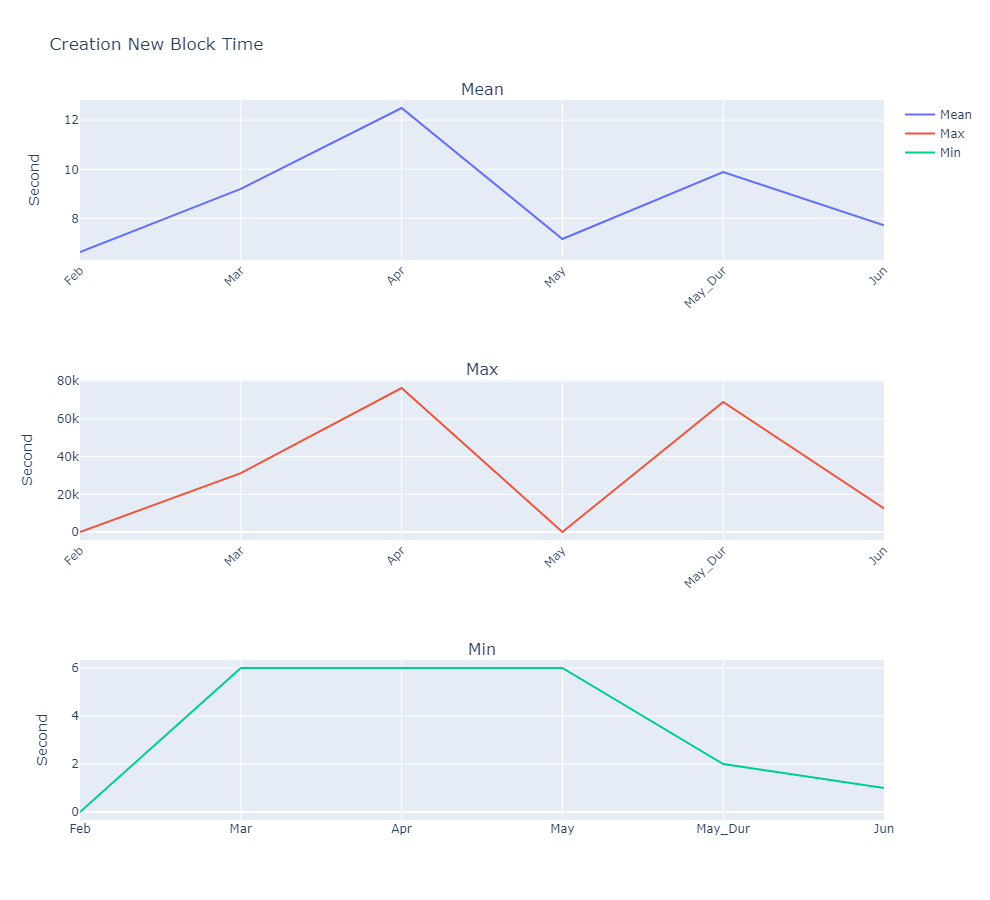

In [193]:
months_inc_attack = ['Feb','Mar','Apr','May','May_Dur','Jun']

# fig6 = px.line(df11, x="Months", y="Creation_New_Block_Time_Mean",) #Plot the data in a stacked bar chart

# fig6.show()
# fig4 = px.line(df4, x="Months", y="Gini_index",color='isValidator')
fig6 = make_subplots(rows=3, cols=1, subplot_titles=("Mean", "Max","Min"))

fig6.add_trace(go.Scatter(
    name='Mean',
    x=df11.Months,
    y=df11.Creation_New_Block_Time_Mean,mode='lines'),row=1,col=1)
#,row=1,col=1
# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig6.add_trace(go.Scatter(
    name='Max',
    x=df12.Months,
    y=df12.Creation_New_Block_Time_Max,mode='lines'),row=2,col=1)

fig6.add_trace(go.Scatter(
    name='Min',
    x=df13.Months,
    y=df13.Creation_New_Block_Time_Min,mode='lines'),row=3,col=1)

fig6.update_yaxes(title_text="Second", row=1, col=1)
fig6.update_yaxes(title_text="Second", row=2, col=1)
fig6.update_yaxes(title_text="Second", row=3, col=1)

fig6.update_layout(barmode='group',width=500,height=900,xaxis_tickangle=-45,xaxis2_tickangle=-45,title_text="Creation New Block Time")

fig6.show()

In [177]:
meme,mm,mimi,total = creationtime_per_block(time_4)

In [181]:
time_4['timestamp'][6623]

'2022-04-07T16:34:47.423834209Z'

In [182]:
time_4['timestamp'][6624]

'2022-04-07T16:34:54.703623633Z'

In [183]:
time_4['timestamp'][6625]

'2022-04-26T10:54:33.253821401Z'

In [319]:
vp_202205 = pd.read_csv(open('./202205_vp.csv', 'rb'))
vp_202201 = pd.read_csv(open('./202201_vp.csv', 'rb'))

In [178]:
for i in range(0,len(total)):
    if total[i] > 1000:
        print(total[i])
        print(i)

65979
6624
76381
19117


In [322]:
vp = 0
for k in range(0, len(vp_202201)):
    sum_vp = np.sum(vp_202201['VOTING_POWER'])
    if vp >= sum_vp/2:
        print(k)
        break
    else:
        vp = vp + vp_202201['VOTING_POWER'][k]
        # print(vp)

18


In [33]:
# coding=utf-8

import ccxt

hitbtc   = ccxt.hitbtc({'verbose': True})
bitmex   = ccxt.bitmex()
huobipro = ccxt.huobipro()
exmo     = ccxt.exmo({
    'apiKey': 'YOUR_PUBLIC_API_KEY',
    'secret': 'YOUR_SECRET_PRIVATE_KEY',
})
kraken = ccxt.kraken({
    'apiKey': 'YOUR_PUBLIC_API_KEY',
    'secret': 'YOUR_SECRET_PRIVATE_KEY',
})

exchange_id = 'binance'
exchange_class = getattr(ccxt, exchange_id)
exchange = exchange_class({
    'apiKey': 'YOUR_API_KEY',
    'secret': 'YOUR_SECRET',
})

hitbtc_markets = hitbtc.load_markets()

print(hitbtc.id, hitbtc_markets)
# print(bitmex.id, bitmex.load_markets())
# print(huobipro.id, huobipro.load_markets())

# print(hitbtc.fetch_order_book(hitbtc.symbols[0]))
# print(bitmex.fetch_ticker('BTC/USD'))
# print(huobipro.fetch_trades('LTC/USDT'))

# print(exmo.fetch_balance())

# sell one ฿ for market price and receive $ right now
print(exmo.id, exmo.create_market_sell_order('BTC/USD', 1))

# limit buy BTC/EUR, you pay €2500 and receive ฿1  when the order is closed
print(exmo.id, exmo.create_limit_buy_order('BTC/EUR', 1, 2500.00))

# pass/redefine custom exchange-specific order params: type, amount, price, flags, etc...
kraken.create_market_buy_order('BTC/USD', 1, {'trading_agreement': 'agree'})


fetch Request: hitbtc GET https://api.hitbtc.com/api/2/public/currency RequestHeaders: {'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'} RequestBody: None

fetch Response: hitbtc GET https://api.hitbtc.com/api/2/public/currency 200 ResponseHeaders: {'Server': 'nginx', 'Date': 'Tue, 23 Aug 2022 08:41:09 GMT', 'Content-Type': 'application/json', 'Content-Length': '31831', 'Connection': 'keep-alive', 'content-encoding': 'gzip', 'Request-ID': '0d5f946914ca44086319fe123efaf50c, f739e0be4e1eabc660eddaa2b31e4f0a', 'Referrer-Policy': 'strict-origin-when-cross-origin, strict-origin-when-cross-origin'} ResponseBody: [{"id":"YOYOW","fullName":"Yoyow","crypto":true,"payinEnabled":false,"payinPaymentId":true,"payinConfirmations":80,"payoutEnabled":false,"payoutIsPaymentId":true,"transferEnabled":true,"delisted":false,"payoutFee":"2075.697690000000","precisionPayout":5,"precisionTransfer":5},{"id":"IQ","fullName":"IQ.cash","cry

AuthenticationError: exmo {"result":false,"error":"Error 40017: Wrong api key"}

In [331]:
kraken.fetch_tickers(['LUNC/USD'])

{'LUNC/USD': {'symbol': 'LUNC/USD',
  'timestamp': 1661239750358,
  'datetime': '2022-08-23T07:29:10.358Z',
  'high': 9.359e-05,
  'low': 8.771e-05,
  'bid': 9.168e-05,
  'bidVolume': None,
  'ask': 9.185e-05,
  'askVolume': None,
  'vwap': 9.1040037e-05,
  'open': 9.176e-05,
  'close': 9.187e-05,
  'last': 9.187e-05,
  'previousClose': None,
  'change': 1.1e-07,
  'percentage': 0.1198779424585876,
  'average': 9.1815e-05,
  'baseVolume': 2768525950.2627816,
  'quoteVolume': 252046.7049473838,
  'info': {'a': ['0.000091850000', '6553670', '6553670.000'],
   'b': ['0.000091680000', '3000000', '3000000.000'],
   'c': ['0.000091870000', '1575063.67693479'],
   'v': ['1240228427.85676258', '2768525950.26278166'],
   'p': ['0.000091973617', '0.000091040037'],
   't': ['526', '1478'],
   'l': ['0.000089840000', '0.000087710000'],
   'h': ['0.000093590000', '0.000093590000'],
   'o': '0.000091760000'}}}

In [26]:
import requests

resp = requests.get('https://api.kraken.com/0/public/OHLC?pair=LUNAUSD&interval=10080&since=1641011600')

# print(len(resp.json()['result']['XXBTZUSD']))
print(type(resp.json()['result']['LUNAUSD'][0][5]))

<class 'str'>


In [43]:
print(resp.json())

{'error': [], 'result': {'LUNAUSD': [[1641427200, '78.44000000', '82.89000000', '62.51000000', '81.93000000', '72.55915000', '778400.79862449', 41308], [1642032000, '81.84000000', '87.90000000', '73.94000000', '81.27000000', '80.52661000', '658256.58219628', 36936], [1642636800, '81.17000000', '84.91000000', '53.89000000', '58.80000000', '67.10406000', '1227416.81114860', 84211], [1643241600, '58.80000000', '61.95000000', '43.50000000', '47.60000000', '50.86855000', '1154658.77701130', 54883], [1643846400, '47.81000000', '60.64000000', '46.59000000', '57.56000000', '55.49583000', '761178.86748203', 43962], [1644451200, '57.46000000', '58.29000000', '49.41000000', '56.02000000', '53.86814000', '492593.54588094', 31490], [1645056000, '56.19000000', '65.00000000', '47.35000000', '59.54000000', '53.53744000', '456820.31104021', 46777], [1645660800, '59.53000000', '97.08000000', '50.33000000', '92.43000000', '75.35635000', '1328128.16511172', 126505], [1646265600, '92.30000000', '104.770000

In [27]:
LUNA_USD = []
time = []
for i in range(0, len(resp.json()['result']['LUNAUSD'])):
    LUNA_USD.append(float(resp.json()['result']['LUNAUSD'][i][5]))
    time.append(i)

In [ ]:
Dates = []
for i in range():
    

In [28]:
df15 = {'Times':time,'LUNA_USD':LUNA_USD}
df15 = pd.DataFrame(df15)

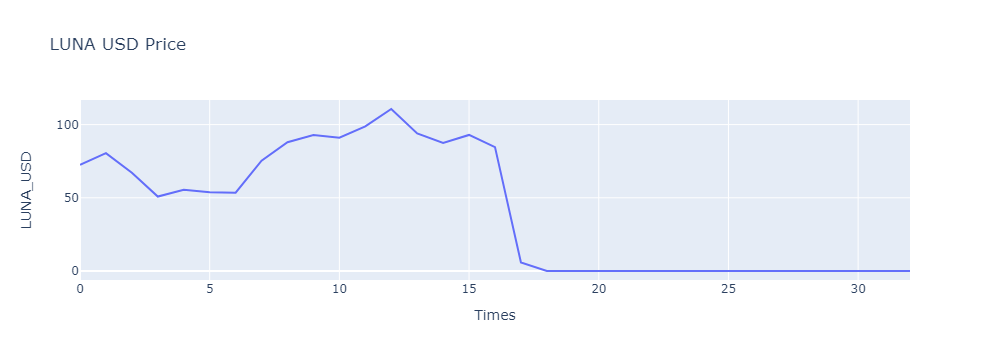

In [30]:
fig7 = px.line(df15, x="Times", y="LUNA_USD", title='LUNA USD Price')
fig7.show()

In [36]:
Distribution_Vali_Size = pd.read_csv(open('./Distribution.csv', 'rb'))
Amount_Stake_Size = pd.read_csv(open('./Amount.csv', 'rb'))

In [37]:
Distribution_Vali_Size

CLASS  COUNT(ADDRESS_LABEL)  SUM(BALANCE)
0     1 - 0-100                   255  1.193817e+03
1    2 - 100-1k                    27  7.732964e+03
2    3 - 1k-10k                    19  7.487699e+04
3  4 - 10k-100k                    10  3.060856e+05
4   5 - 100k-1M                     4  1.088785e+06
5     6 - 1M-1B                     2  2.533637e+07

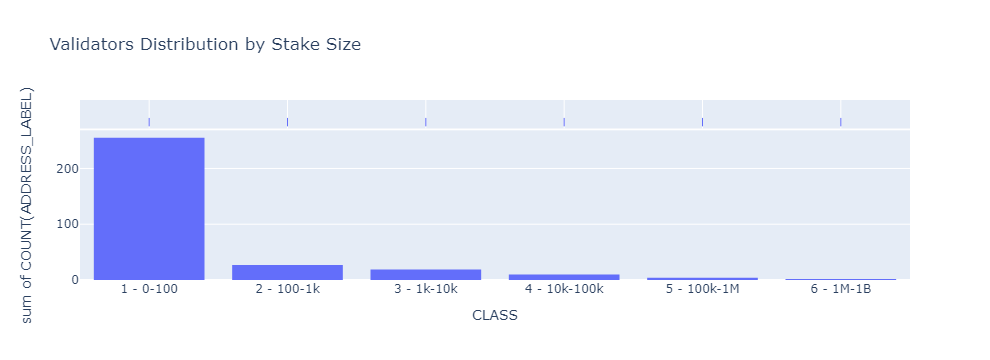

In [40]:
# fig7 = px.line( title='Validators Distribution by Stake Size')
# fig7.show()
fig7 = px.histogram(Distribution_Vali_Size, x="CLASS", y="COUNT(ADDRESS_LABEL)", marginal="rug",
                   hover_data=Distribution_Vali_Size.columns, title='Validators Distribution by Stake Size')
fig7.show()

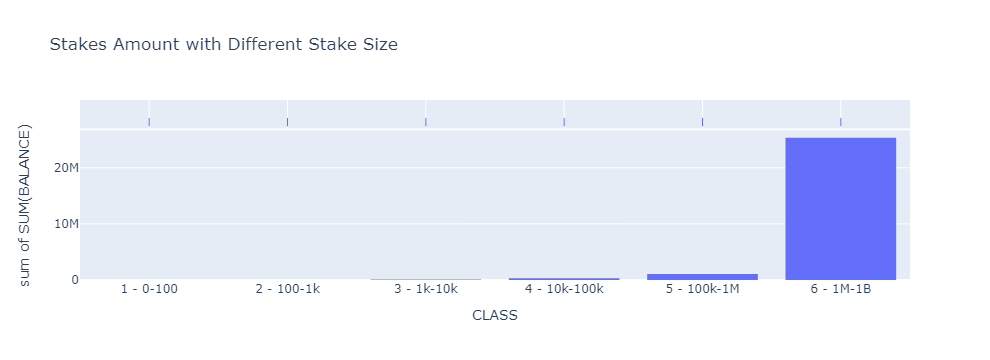

In [41]:
# fig7 = px.line( title='Validators Distribution by Stake Size')
# fig7.show()
fig8 = px.histogram(Amount_Stake_Size, x="CLASS", y="SUM(BALANCE)", marginal="rug",
                   hover_data=Amount_Stake_Size.columns, title='Stakes Amount with Different Stake Size')
fig8.show()

In [50]:
from datetime import datetime
LUNAUSD_720_Q2 = pd.read_csv(open('./LUNAUSD_720_Q2.csv', 'rb'))
LUNAUSD_720_Q1 = pd.read_csv(open('./LUNAUSD_720.csv', 'rb'))
LUNAUSD_720_Q1.columns = ['TimeStamp', 'Open','High', 'Low', 'Close', 'Volume', 'Trades']
LUNAUSD_720_Q2.columns = ['TimeStamp', 'Open','High', 'Low', 'Close', 'Volume', 'Trades']
LUNAUSD_720_Q1 = pd.concat([LUNAUSD_720_Q1, LUNAUSD_720_Q2],ignore_index=True, axis=0)
for i in range(0, len(LUNAUSD_720_Q1)):
    LUNAUSD_720_Q1['TimeStamp'][i] = datetime.fromtimestamp(LUNAUSD_720_Q1['TimeStamp'][i])


/tmp/ipykernel_2424606/950484764.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
LUNAUSD_720_Q1['TimeStamp'][0]

datetime.datetime(2022, 1, 1, 12, 0)

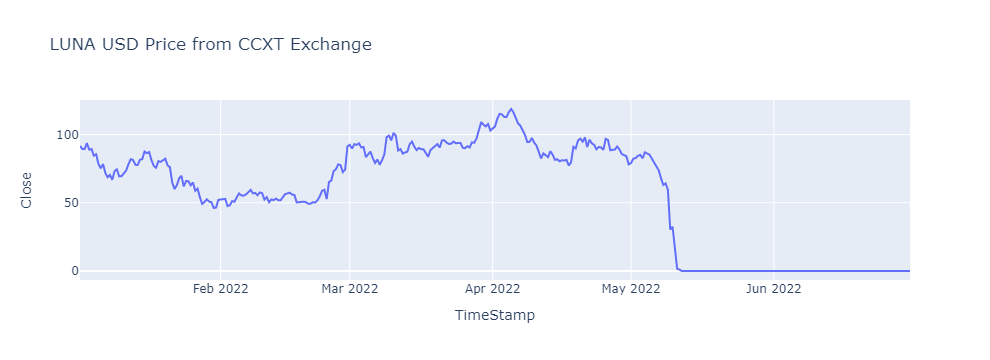

In [53]:
fig9 = px.line(LUNAUSD_720_Q1, x="TimeStamp", y="Close", title='LUNA USD Price from CCXT Exchange')
fig9.show()

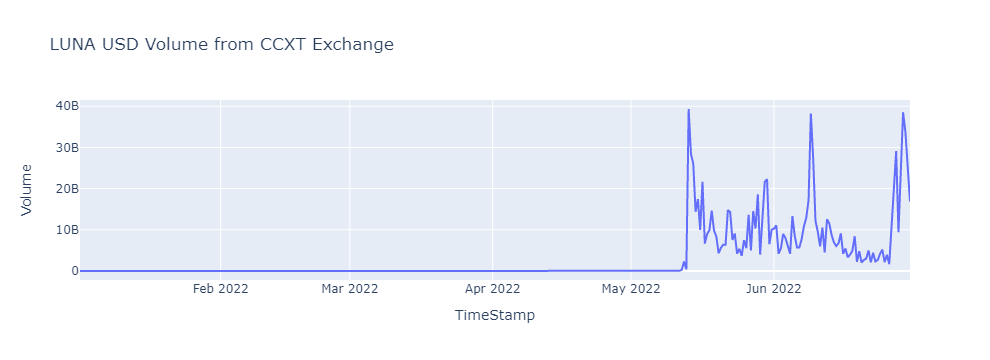

In [54]:
fig10 = px.line(LUNAUSD_720_Q1, x="TimeStamp", y="Volume", title='LUNA USD Volume from CCXT Exchange')
fig10.show()

In [194]:
fig13 = make_subplots(rows=3, cols=1, subplot_titles=("Mean", "Max","Min"))
fig13.add_trace(go.Scatter(
    name='Volume',
    x=LUNAUSD_720_Q1.TimeStamp,
    y=LUNAUSD_720_Q1.Volume,mode='lines'))

fig13.add_trace(go.Scatter(
    name='Traders',
    x=LUNAUSD_720_Q1.TimeStamp,
    y=LUNAUSD_720_Q1.Traders,mode='lines'))
fig13.show()

NameError: name 'fig13' is not defined

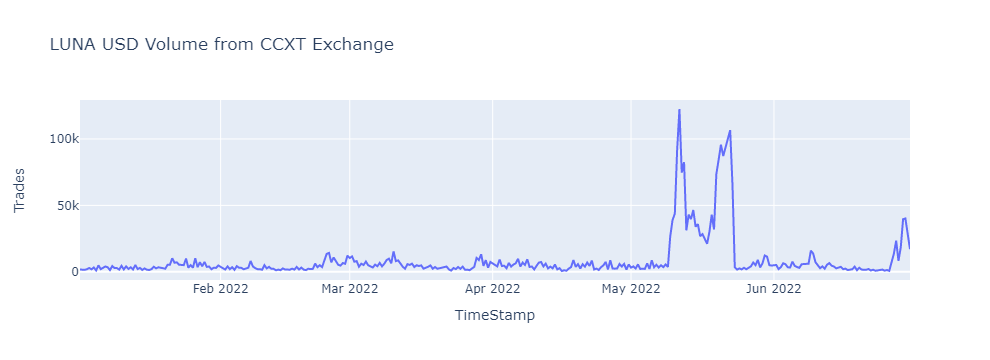

In [55]:
fig11 = px.line(LUNAUSD_720_Q1, x="TimeStamp", y="Trades", title='LUNA USD Volume from CCXT Exchange')
fig11.show()

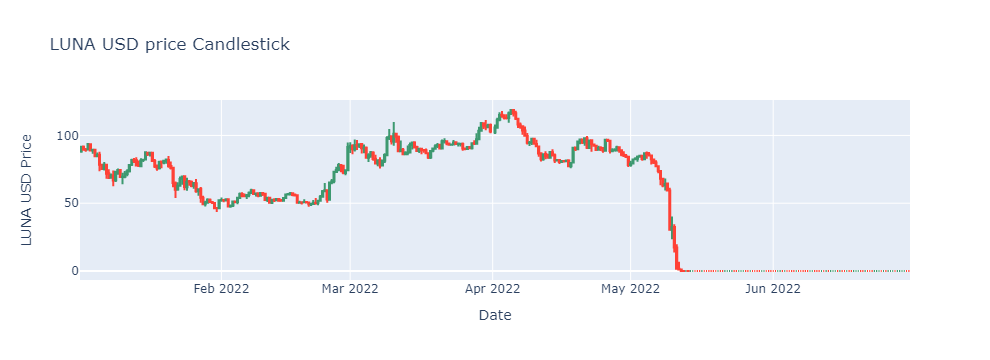

In [61]:
fig12 = go.Figure(data=[go.Candlestick(x=LUNAUSD_720_Q1['TimeStamp'],
                open=LUNAUSD_720_Q1['Open'],
                high=LUNAUSD_720_Q1['High'],
                low=LUNAUSD_720_Q1['Low'],
                close=LUNAUSD_720_Q1['Close'])])
fig12.update_layout(xaxis_rangeslider_visible=False, title='LUNA USD price Candlestick',
    yaxis_title='LUNA USD Price', xaxis_title = 'Date')

fig12.show()